In [1]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")

using StaticArrays, DifferentialEquations, DynamicalSystems, LinearAlgebra
sE, sI, rE, rI, Y  = -50..50, -50..50,  -50..50, -50..50, -50..50
box = sE × sI × rE × rI × Y
using CairoMakie

include(pathtorepo * "dynamical-systems\\system.jl")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`

rate_jac (generic function with 1 method)

In [2]:
function show_fp(fp, names)
    for (index, fp_) in enumerate(fp)
        println("$(index) - fp:")
        for (i, cord) in enumerate(fp_)
                println("$(names[i]): $cord")
        end
    end
end
function show_eigenvalues(ei)
    for (index, ei_) in enumerate(ei)
        println("$(index) - fp:")
        for (i, ei__) in enumerate(ei_)
            println("$ei__")
        end
    end
end
names = ["sE", "sI", "rE", "rI", "Y"];

τsE = 3.0; γE = 4.0; s0E = 0.15;
τsI = 10.0; γI = 8.0; s0I = +0.32507438;

τrE = 2.0; kE = 5.0; IE = 0.9; wEE = 3.5; wIE = 5.0; θE = 0.2;
τrI = 6.0; kI = 5.0; II = 0.0; wEI = 5.0; wII = 3.0; θI = 0.4;

τY = 0.01;  βY = 0.01;
ythr = 0.5; sEthr = 0.5; kY = 0.01
γY = 0.0

0.0

In [3]:
time = 1000.0; tt = 250.0; tstep = 0.001; times = [time, tt]
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [4]:
p = [τsE, γE, s0E, τsI, γI, s0I, τrE, kE, IE, wEE, wIE, θE, τrI, kI, II, wEI, wII, θI, τY, βY, γY, ythr, sEthr, kY];
u0 = [0.0583, 0.2797, 0.0779, 0.0312, 3.0079e-07]

ds = CoupledODEs(model_braint_rhythms, u0, p, diffeq = integ_set)
traj, trange = trajectory(ds, time, Δt = tstep, Ttr = 0.0)

(5-dimensional StateSpaceSet{Float64} with 1000001 points, 0.0:0.001:1000.0)

In [5]:
fp, ei, _ = fixedpoints(ds, box, rate_jac)
show_fp(fp, names)
println("")
show_eigenvalues(ei)

1 - fp:
sE: 0.2038456920320365
sI: 0.44520847844293177
rE: 0.016908057738664897
rI: 0.02706739689031421
Y: 1.3746173646352244e-17

1 - fp:
-100.0 + 0.0im
-0.7966545770528585 + 0.0im
-0.3476919808488968 + 0.0im
7.428170230833718e-5 - 0.20733329958895585im
7.428170230833718e-5 + 0.20733329958895585im


In [6]:
fixedpoint = fp[1]

Jacobian = rate_jac(fixedpoint, p, 0)
eivecs = eigvecs(Jacobian)

vec_stable = real(eivecs[:, 2])
ϵ = 1e-4

shift = fixedpoint - vec_stable*ϵ

5-element SVector{5, Float64} with indices SOneTo(5):
 0.20393658398626865
 0.4452182185753655
 0.016870317160929717
 0.027052583677689965
 1.3872118651594189e-17

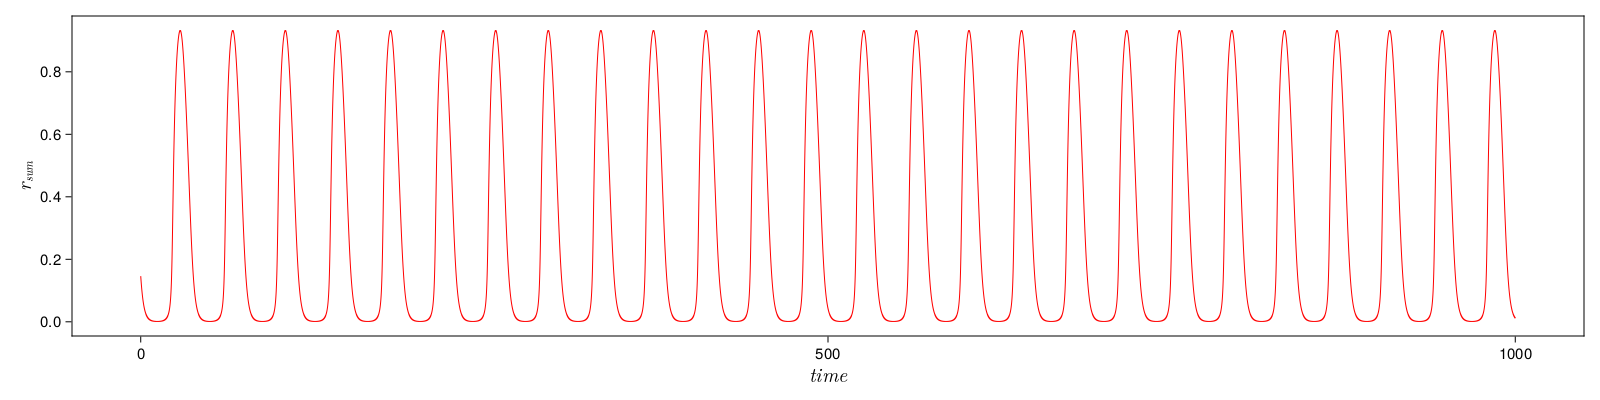

CairoMakie.Screen{IMAGE}


In [302]:
tstart, tend = 1, length(tr)
tickssize = 15
labelsize = 20

CairoMakie.activate!()
f= Figure(resolution = (1600, 400))
axis  = Axis(f[1, 1], xlabel = L"time", ylabel = L"r_{sum}", xlabelsize = labelsize, ylabelsize = labelsize, xticklabelsize = tickssize, yticklabelsize = tickssize, xgridvisible = false, ygridvisible = false)

lines!(axis, trange[tstart:tend], tr[tstart:tend, 3], linewidth = 1.0, color = :red)
#lines!(axis, trange[tstart:tend], tr[tstart:tend, 4], linewidth = 1.0, color = :blue)

display(f)

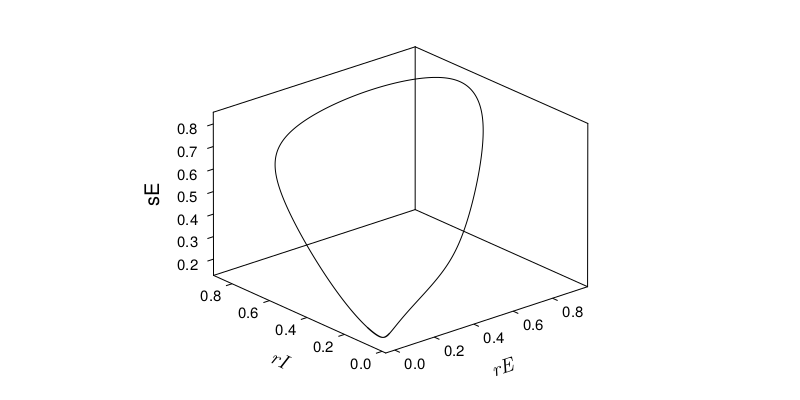

CairoMakie.Screen{IMAGE}


In [303]:
tstart, tend = 1, length(tr)
tickssize = 15
labelsize = 20

CairoMakie.activate!()
f= Figure(resolution = (800, 400))
axis  = Axis3(f[1, 1], xlabel = L"rE", ylabel = L"rI", zlabel = "sE",
                xlabelsize = labelsize, ylabelsize = labelsize, zlabelsize = labelsize,
                xticklabelsize = tickssize, yticklabelsize = tickssize, zticklabelsize = tickssize,
                xgridvisible = false, ygridvisible = false, zgridvisible = false)

lines!(axis, tr[tstart:tend, 3], tr[tstart:tend, 4], tr[tstart:tend, 1],  linewidth = 1.0, color = :black)
display(f)